# Introduction

# About the data

Column | Description
-----------|-------------------
ID | Unique ID.
Gender | Gender of the customer
Ever_Married | Marital status of the customer.
Age | Age of the customer.
Graduated | Is the customer a graduate?
Profession | Profession of the customer.
Work_Experience | Work Experience in years.
Spending_Score | Spending score of the customer.
Family_Size | Number of family members for the customer (including the customer).
Var_1 | Anonymised Category for the customer.
Segmentation | Customer Segment of the customer (Target for Classification).


# Business question and evaluation

# Importing and exploring data

In [1]:
# Importing

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading data

data = pd.read_csv('data/Train.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
# Shape

data.shape

(8068, 11)

> 8068 instances and 11 features. Its a reasonable sized dataset.

In [4]:
# Check for duplicates

data.duplicated().sum()

0

We won't need the `ID` anymore. Furthermore, since we're clustering, we can also drop `Var_1` and `Segmentation`.

In [5]:
# Drop columns we won't use

df = data.drop(['ID', 'Var_1', 'Segmentation'], axis=1)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 504.4+ KB


In [7]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [8]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


Since our objective is to characterize our clients, it's wise to don't bring any assumptions and impute the missing values. Instead, I'll only use complete data.

In [9]:
df_dropna = df.dropna()
df_dropna.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

# EDA

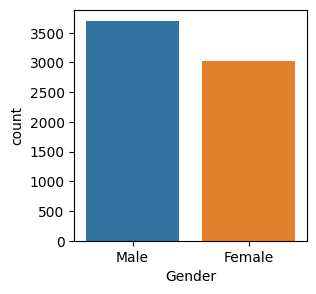

In [10]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Gender');

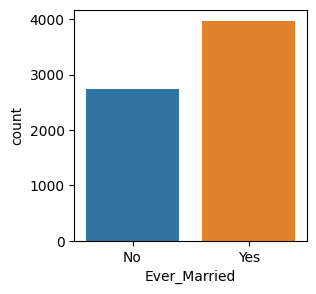

In [11]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Ever_Married');

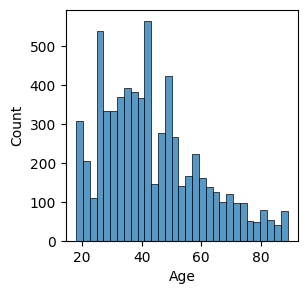

In [12]:
plt.figure(figsize=(3,3))
sns.histplot(df_dropna, x='Age');

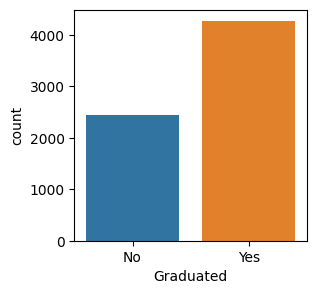

In [13]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Graduated');

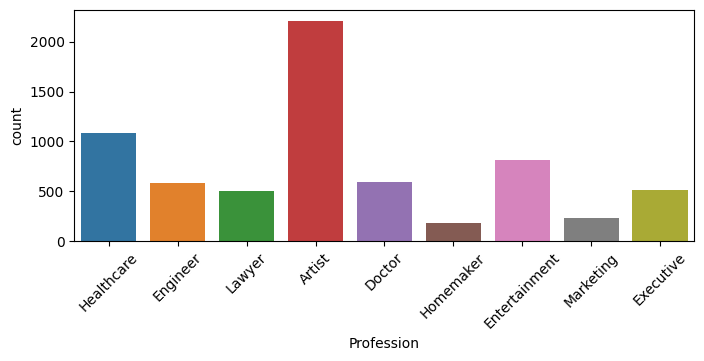

In [14]:
plt.figure(figsize=(8,3))
chart = sns.countplot(df_dropna, x='Profession', order=)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [15]:
# Plot it in order

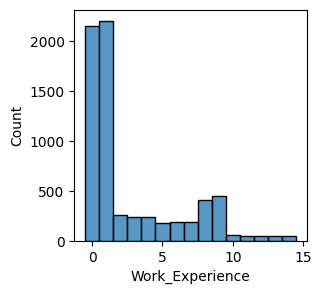

In [16]:
plt.figure(figsize=(3,3))
sns.histplot(df_dropna, x='Work_Experience', discrete=True);

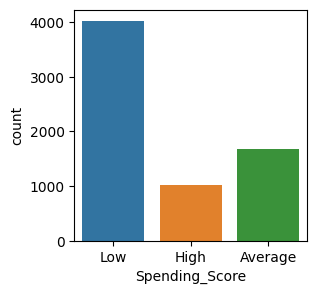

In [17]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Spending_Score');

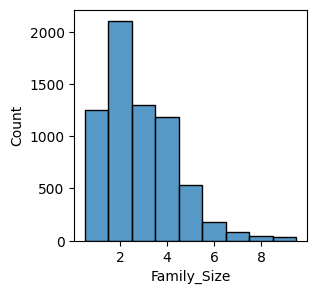

In [18]:
plt.figure(figsize=(3,3))
sns.histplot(df_dropna, x='Family_Size', discrete=True);

# Treatment

In [19]:
def get_indexes(df, cols):
    df_cols = list(df.columns)
    indexes = []
    
    for col in cols:
        index = df_cols.index(col)
        indexes.append(index)
        
    return indexes

In [20]:
# ohe_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession']
# ord_cols = ['Spending_Score']
# num_cols = ['Age', 'Work_Experience', 'Family_Size']
# cat_cols = ohe_cols + ord_cols

# ordinal_enc = OrdinalEncoder(categories=[['Low', 'Average', 'High']])
# onehot_enc = OneHotEncoder(drop='first')
# std_scaler = StandardScaler()

# ct =  ColumnTransformer([('ordinal_enc', ordinal_enc, ord_cols),
#                          ('onehot_enc', onehot_enc, onehot_cols),
#                          ('std_scaler', std_scaler, num_cols)
#                         ])

# df_tr = ct.fit_transform(df_dropna)

In [21]:
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
num_cols = ['Age', 'Work_Experience', 'Family_Size']

ct =  ColumnTransformer([('std_scaler', StandardScaler(), num_cols)], remainder='passthrough')

df_tr = pd.DataFrame(ct.fit_transform(df_dropna), index=df_dropna.index, columns=num_cols+cat_cols)
df_tr.head()

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score
0,-1.303562,-0.478692,0.760391,Male,No,No,Healthcare,Low
2,1.421748,-0.478692,-1.20914,Female,Yes,Yes,Engineer,Low
3,1.421748,-0.772431,-0.55263,Male,Yes,Yes,Lawyer,High
5,0.755561,-0.772431,-0.55263,Male,Yes,No,Artist,Average
6,-0.697937,-0.478692,0.103881,Male,No,Yes,Healthcare,Low


# Clustering

## Finding k by elbow method

In [37]:
# !pip install kmodes

In [45]:
# from kmodes.kprototypes import KPrototypes

# k_list = np.arange(1,9)
# inertia_list = []

# for k in k_list:
#     kprototypes = KPrototypes(n_clusters=k, max_iter=100, init='Huang', n_init=25,
#                               n_jobs=-1, random_state=42)
#     kprototypes.fit(df_tr.to_numpy(), categorical=get_indexes(df_tr, cat_cols))
#     inertia_list.append(kprototypes.cost_)

In [46]:
k_list = np.arange(1,9)

inertia_list = [27851.500000000106,
                21540.113628510728,
                16436.276660241074,
                14167.043121648308,
                12486.212367799326,
                11475.714806273721,
                10652.063586330649,
                10146.0266997184
               ]


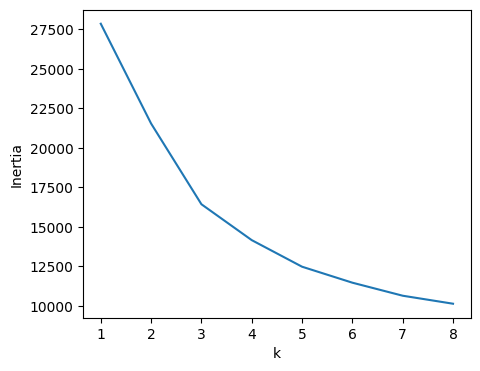

In [47]:
plt.figure(figsize=(5,4))
plt.plot(k_list, inertia_list)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

> Best result around $k = 3$ or $k = 4$.

In [48]:
# !pip install kneed

In [49]:
from kneed import KneeLocator

KneeLocator(x=k_list, y=inertia_list, S=0.1, curve='convex', direction='decreasing').elbow

3

> Again, $k=3$ sounds good.

# Analysis of the clusters

In [146]:
from kmodes.kprototypes import KPrototypes

k = 4
kprototypes = KPrototypes(n_clusters=k, max_iter=500, init='Huang', n_init=50,
                          n_jobs=-1, random_state=42)

kprototypes.fit(df_tr.to_numpy(), categorical=get_indexes(df_tr, cat_cols))

KPrototypes(gamma=0.5, init='Huang', max_iter=500, n_clusters=4, n_init=50,
            n_jobs=-1, random_state=42)

In [147]:
labels = kprototypes.labels_

In [148]:
df_dropna['labels'] = labels

/tmp/ipykernel_194262/3675639296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['labels'] = labels


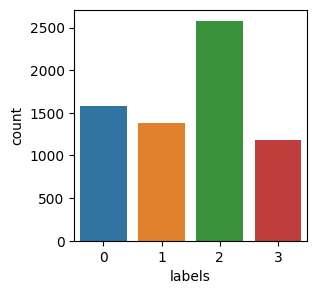

In [149]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='labels', );

> Label 1 is the biggest cluster.

In [150]:
# Analysing mean of numerical features

df_dropna[num_cols + ['labels']].groupby('labels').mean()

,Age,Work_Experience,Family_Size
labels,,,
0,30.106032,1.455238,4.668571
1,37.860566,8.471314,2.402324
2,42.227431,0.989539,2.265014
3,70.764557,0.974684,2.180591


In [151]:
# Analysing medianb of numerical features
df_dropna[num_cols + ['labels']].groupby('labels').median()

,Age,Work_Experience,Family_Size
labels,,,
0,28.0,1.0,4.0
1,37.0,8.0,2.0
2,42.0,1.0,2.0
3,70.0,1.0,2.0


In [152]:
# Analysing standard deviation of numerical features
df_dropna[num_cols + ['labels']].groupby('labels').std()

,Age,Work_Experience,Family_Size
labels,,,
0,10.109606,2.057712,1.372954
1,10.303083,1.983419,1.223294
2,9.208471,1.199276,0.984518
3,8.934035,1.516029,0.990390


In [153]:
# Table with modes for the categorical features

df_dropna[cat_cols + ['labels']].groupby('labels').agg(lambda x: pd.Series.mode(x))

,Gender,Ever_Married,Graduated,Profession,Spending_Score
labels,,,,,
0,Male,No,No,Healthcare,Low
1,Female,Yes,Yes,Artist,Low
2,Male,Yes,Yes,Artist,Low
3,Male,Yes,Yes,Lawyer,High


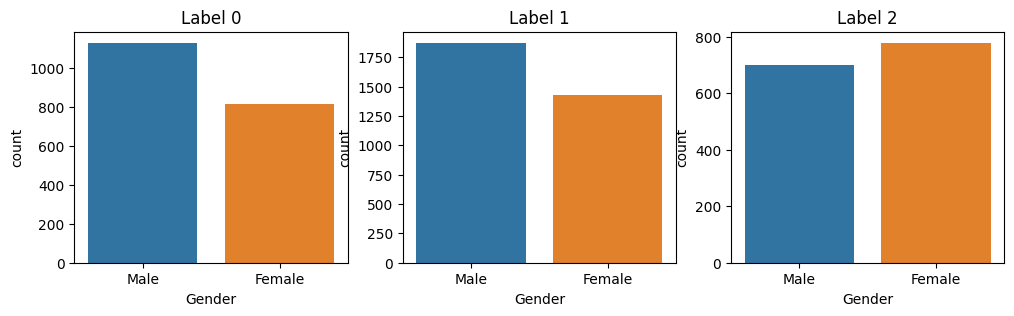

In [136]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.countplot(df_dropna[df_dropna['labels'] == 0], x='Gender', order=['Male', 'Female'])
plt.title('Label 0')

plt.subplot(1,3,2)
sns.countplot(df_dropna[df_dropna['labels'] == 1], x='Gender', order=['Male', 'Female'])
plt.title('Label 1')

plt.subplot(1,3,3)
sns.countplot(df_dropna[df_dropna['labels'] == 2], x='Gender', order=['Male', 'Female'])
plt.title('Label 2')

plt.show()

> Somewhat simillar distribution. Label 0 and 1 are majority masculine.

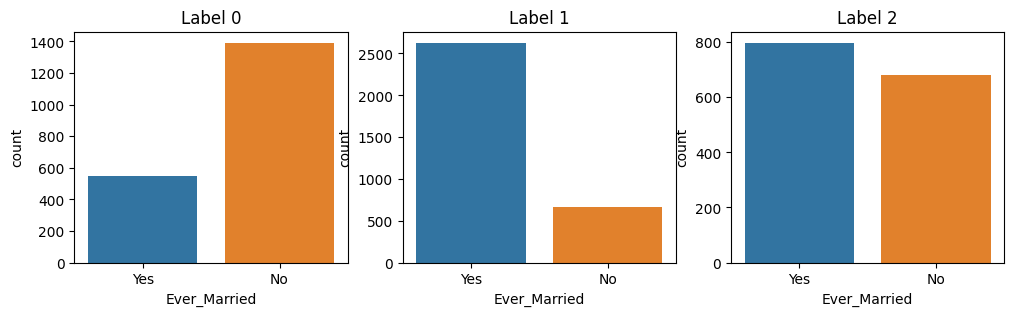

In [137]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.countplot(df_dropna[df_dropna['labels'] == 0], x='Ever_Married', order=['Yes', 'No'])
plt.title('Label 0')

plt.subplot(1,3,2)
sns.countplot(df_dropna[df_dropna['labels'] == 1], x='Ever_Married', order=['Yes', 'No'])
plt.title('Label 1')

plt.subplot(1,3,3)
sns.countplot(df_dropna[df_dropna['labels'] == 2], x='Ever_Married', order=['Yes', 'No'])
plt.title('Label 2')

plt.show()

> Label 0 contains most of the never married.

In [ ]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.countplot(df_dropna[df_dropna['labels'] == 0], x='Spending_Score', order=['Low', 'Average', 'High'])
plt.title('Label 0')

plt.subplot(1,3,2)
sns.countplot(df_dropna[df_dropna['labels'] == 1], x='Spending_Score', order=['Low', 'Average', 'High'])
plt.title('Label 1')

plt.subplot(1,3,3)
sns.countplot(df_dropna[df_dropna['labels'] == 2], x='Spending_Score', order=['Low', 'Average', 'High'])
plt.title('Label 2')

plt.show()

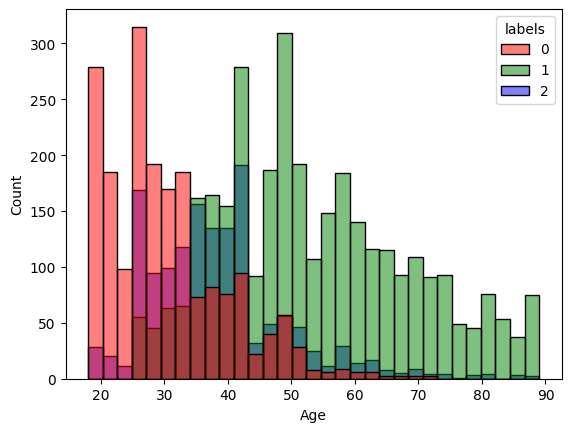

In [138]:
sns.histplot(df_dropna, x='Age', hue='labels', palette=['r', 'g', 'b']);

In [ ]:
sns.histplot(df_dropna, x='Work_Experience', hue='labels', palette=['r', 'g', 'b']);

In [ ]:
sns.histplot(df_dropna, x='Family_Size', hue='labels', palette=['r', 'g', 'b']);

In [98]:
df_dropna.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'labels'],
      dtype='object')

# Conclusions